# 1. Introduction - CNN Basics

Introduction of Module 3 -  **Convolutional Neural Networks**

* Fact - On focused training accuracy of CNN in image detection is better than humans sometimes.
* Human recognizes patterns in group of points
* CNN recognizes patterns in group of pixels
* CNN is a type of neural network, better than ANN for pattern recognition.
* In CNN we have convolutional layers.
* Convolutional layers are made up of filters.
* Filters are matrices of weights.
* Filters are used to extract features from images.

### Stride
* Shifting of window of pixels in lamen language.
* Stride is the number of pixels we move each time we slide the filter matrix over the image.
* Stride is a hyperparameter.
* Stride is used to reduce the size of the output.
* Stride is used to reduce the computational complexity.
* Stride is used to determine 
    * How many times we apply the filter to the image.
    * How many times we slide the filter over the image.


### Padding
* Padding is used to preserve the size of the image.
* Padding is used to preserve the information at the edges of the image.
* Padding is used to prevent the loss of information at the edges of the image.
* Cutting edges comes under Valid padding.
* Adding zeros comes under Same padding.

` Stride denotes how many steps we are moving in each steps in convolution, by default it is one and padding is a process of adding zeros to input matrix symmetrically to maintain the dimension of output as in input. `

### Filters 
- Filter is a matrix of dimension of same as window size.
- Filter is used to extract features from an image.
- Filter is also called as kernel.
- Our network learns few values.

### Feature Maps
- Feature map is the output of a filter.
- Feature map is also called as activation map.
- Each feature map has some feature highlights.
- Each position results in an activation of neuron andoutput is collected in feature map.

### Channels
- Image can be grayscaled or coloured and ranges between 0 to 255 or 000000 to FFFFFF.
- Grayscale image has only one channel.
- Coloured image has three channels.
- Each pixel of any colored image  have its own RGB value that is responsible for that color of pixel.
- Each channel is responsible for one color.
- Channel is a collection of feature maps.
- Channel is also called as depth.


### Pooling Layers
- It reduces number of parameters by reducing spatial dimensions, thus increasing efficiency while training.
- Pooling layer is used to reduce the size of the feature map.
- Pooling layer is also called as downsampling layer.
- Pooling layer is used to extract dominant features.

    - Max Pooling : The max pixel value of batch is selected. 
    - Average Pooling : The average pixel value of batch is selected.
    


# Creating CNN Model in Python.


In [1]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
fm = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fm.load_data()

**Label | Description**

0       | T-shirt/Top

1       | Trouser

2       | Pullover

3       | Dress

4       | Coat

5       | Sandal

6       | Shirt

7       | Sneaker

8       | Bag

9       | Ankle boot

In [3]:
class_names = ["Tshirt/Top", "Trouser",
               "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker",
               "Bag", "Ankle boot"]

### Data Reshaping

changing data into 3D 

In [4]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

### data normalization

In [5]:
x_train_n = x_train / 255.
x_test_n = x_test / 255.

Splitting data into Train-Test Split
- Training Dataset is defined as data used for training the model
- Testing Dataset is defined as data used for testing the model

- Validation Data is used for tuning the hyperparameters  and evaluate the models.


In [6]:
x_valid, x_train = x_train_n[:5000], x_train_n[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]
x_test = x_test_n

print(x_valid.shape)
print(x_train.shape)
print(y_valid.shape)
print(y_train.shape)
print(x_test.shape)

(5000, 28, 28, 1)
(55000, 28, 28, 1)
(5000,)
(55000,)
(10000, 28, 28, 1)


Creating model architecture

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

![architecture](archimg.jpg)


In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides=1, padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))        
model.add(keras.layers.Dense(10, activation="softmax"))
          

In [15]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


In [23]:
model_history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data = (x_valid,y_valid))

Epoch 1/30
860/860 [==============================] - 61s 70ms/step - loss: 0.3262 - accuracy: 0.8824 - val_loss: 0.3644 - val_accuracy: 0.8678
Epoch 2/30
860/860 [==============================] - 66s 76ms/step - loss: 0.3153 - accuracy: 0.8858 - val_loss: 0.3329 - val_accuracy: 0.8844
Epoch 3/30
860/860 [==============================] - 67s 78ms/step - loss: 0.3066 - accuracy: 0.8874 - val_loss: 0.5596 - val_accuracy: 0.8002
Epoch 4/30
860/860 [==============================] - 67s 78ms/step - loss: 0.2981 - accuracy: 0.8924 - val_loss: 0.3189 - val_accuracy: 0.8876
Epoch 5/30
860/860 [==============================] - 59s 68ms/step - loss: 0.2919 - accuracy: 0.8931 - val_loss: 0.3104 - val_accuracy: 0.8894
Epoch 6/30
860/860 [==============================] - 60s 70ms/step - loss: 0.2828 - accuracy: 0.8963 - val_loss: 0.2981 - val_accuracy: 0.8980
Epoch 7/30
860/860 [==============================] - 60s 70ms/step - loss: 0.2762 - accuracy: 0.9010 - val_loss: 0.3236 - val_accuracy:

In [24]:
model_history.history

{'loss': [0.3261885344982147,
  0.3153083026409149,
  0.3065861761569977,
  0.29810386896133423,
  0.29189345240592957,
  0.2827948331832886,
  0.2761920988559723,
  0.270163893699646,
  0.2645586431026459,
  0.2581954598426819,
  0.2525307238101959,
  0.24645154178142548,
  0.24333547055721283,
  0.2381906807422638,
  0.2327369898557663,
  0.22883668541908264,
  0.22345945239067078,
  0.22045521438121796,
  0.2158544510602951,
  0.21179349720478058,
  0.20749777555465698,
  0.2035588026046753,
  0.1989595592021942,
  0.19471299648284912,
  0.19187301397323608,
  0.18871468305587769,
  0.18483944237232208,
  0.18095597624778748,
  0.1767784208059311,
  0.17383445799350739],
 'accuracy': [0.8823999762535095,
  0.8858181834220886,
  0.8874363899230957,
  0.8923636078834534,
  0.8931090831756592,
  0.8963272571563721,
  0.9010363817214966,
  0.9015636444091797,
  0.9028727412223816,
  0.9052545428276062,
  0.9075090885162354,
  0.9097272753715515,
  0.9112363457679749,
  0.912472724914550

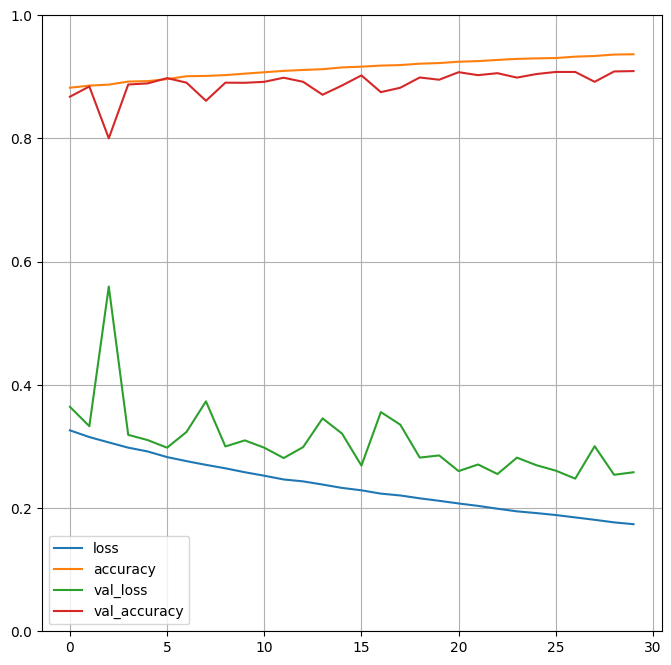

In [26]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [27]:
evaluate = model.evaluate(x_test_n, y_test)
print(evaluate)

313/313 [==============================] - 7s 22ms/step - loss: 0.2671 - accuracy: 0.9042
[0.26711270213127136, 0.90420001745224]


In [29]:
x_new = x_test[:10]


In [33]:
y_pred = model.predict(x_new)
print(y_pred.round(2))

[[0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.99]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.13 0.   0.03 0.   0.   0.   0.84 0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]]


In [34]:
y_pred = np.argmax(y_pred, axis=-1)
y_pred

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [35]:
out = np.array(class_names)[y_pred]
print(out)

['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt' 'Trouser' 'Coat'
 'Shirt' 'Sandal' 'Sneaker']


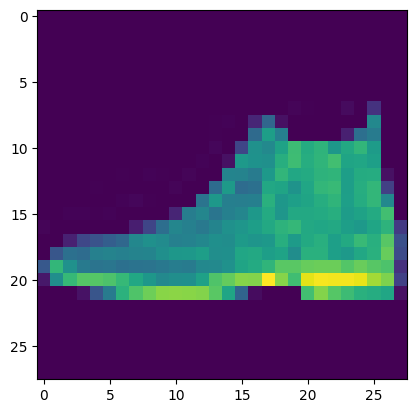

In [39]:
plt.imshow(x_test[0].reshape((28,28)))

### Without pooling Layer

In [40]:
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides=1, padding='valid', activation='relu', input_shape=(28,28,1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation='relu'))
model_b.add(keras.layers.Dense(100, activation='relu'))        
model_b.add(keras.layers.Dense(10, activation="softmax"))
          

In [41]:
model_b.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


In [42]:
model_b.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               6489900   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


In [44]:
model_b_history = model_b.fit(x_train, y_train, epochs=10, batch_size=64, validation_data = (x_valid,y_valid))

Epoch 1/10
860/860 [==============================] - 108s 123ms/step - loss: 0.7181 - accuracy: 0.7503 - val_loss: 0.7066 - val_accuracy: 0.7400
Epoch 2/10
860/860 [==============================] - 106s 124ms/step - loss: 0.4902 - accuracy: 0.8225 - val_loss: 0.4643 - val_accuracy: 0.8224
Epoch 3/10
860/860 [==============================] - 88s 102ms/step - loss: 0.4386 - accuracy: 0.8404 - val_loss: 0.8607 - val_accuracy: 0.7076
Epoch 4/10
860/860 [==============================] - 72s 83ms/step - loss: 0.4067 - accuracy: 0.8529 - val_loss: 0.3951 - val_accuracy: 0.8598
Epoch 5/10
860/860 [==============================] - 76s 89ms/step - loss: 0.3864 - accuracy: 0.8599 - val_loss: 0.3831 - val_accuracy: 0.8586
Epoch 6/10
860/860 [==============================] - 75s 87ms/step - loss: 0.3655 - accuracy: 0.8658 - val_loss: 0.3640 - val_accuracy: 0.8676
Epoch 7/10
860/860 [==============================] - 75s 87ms/step - loss: 0.3524 - accuracy: 0.8706 - val_loss: 0.3848 - val_accu

In [46]:
model_b_history.history

{'loss': [0.718059241771698,
  0.4901924729347229,
  0.4385647475719452,
  0.40672826766967773,
  0.3864136040210724,
  0.3655492961406708,
  0.352387398481369,
  0.3392584025859833,
  0.32950901985168457,
  0.32094869017601013],
 'accuracy': [0.7503272891044617,
  0.822490930557251,
  0.8404363393783569,
  0.8529272675514221,
  0.859854519367218,
  0.865818202495575,
  0.8706181645393372,
  0.8766000270843506,
  0.8793636560440063,
  0.8827636241912842],
 'val_loss': [0.706598699092865,
  0.4643176794052124,
  0.8607403039932251,
  0.39508894085884094,
  0.3831064701080322,
  0.36396270990371704,
  0.38483932614326477,
  0.436475545167923,
  0.34943917393684387,
  0.380521684885025],
 'val_accuracy': [0.7400000095367432,
  0.8223999738693237,
  0.7075999975204468,
  0.8597999811172485,
  0.8586000204086304,
  0.8676000237464905,
  0.8578000068664551,
  0.8274000287055969,
  0.8690000176429749,
  0.8593999743461609]}

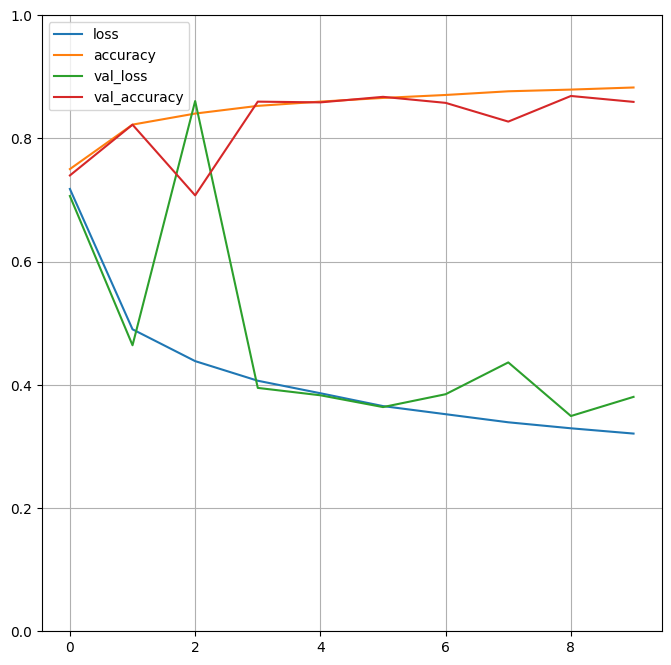

In [47]:
pd.DataFrame(model_b_history.history).plot(figsize=(8,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [51]:
evaluate_b = model_b.evaluate(x_test_n, y_test)
print(evaluate_b)

313/313 [==============================] - 6s 20ms/step - loss: 0.4206 - accuracy: 0.8435
[0.42058631777763367, 0.843500018119812]


### Conclusion 

A little low accuracy and very high execution time